# EDA

In [12]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install matplotlib.pyplot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [14]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [18]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(12)

In [20]:
df = df.drop_duplicates()

In [21]:
df.duplicated().sum()

np.int64(0)

### Value Counts for Categorical Columns

In [22]:
print(df['y'].value_counts())
print()
print(df['job'].value_counts())
print()
print(df['marital'].value_counts())
print()
print(df['education'].value_counts())

y
no     36537
yes     4639
Name: count, dtype: int64

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64


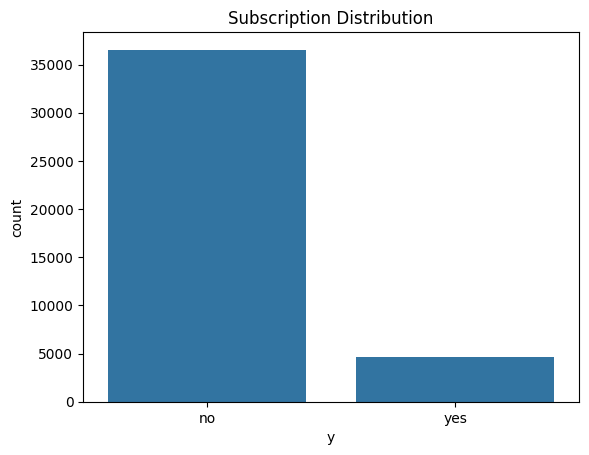

In [23]:
# Visualize the distribution of the target variable
sns.countplot(x='y', data=df)
plt.title('Subscription Distribution')
plt.show()

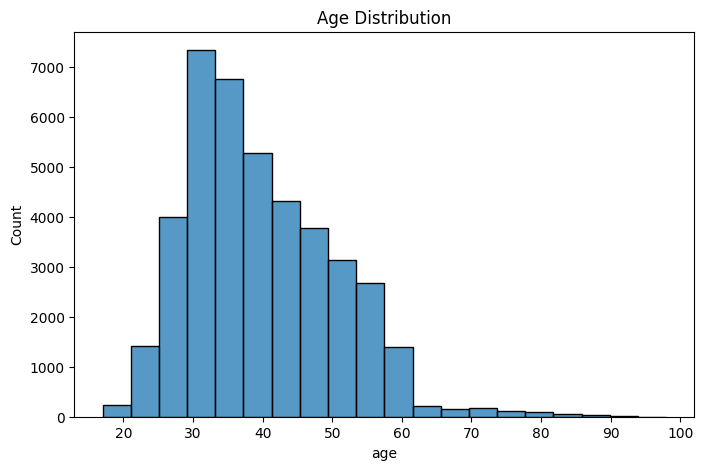

In [24]:
#Distribution of Age

plt.figure(figsize = (8,5))
sns.histplot(data = df['age'], bins = 20)
plt.title('Age Distribution')
plt.show()

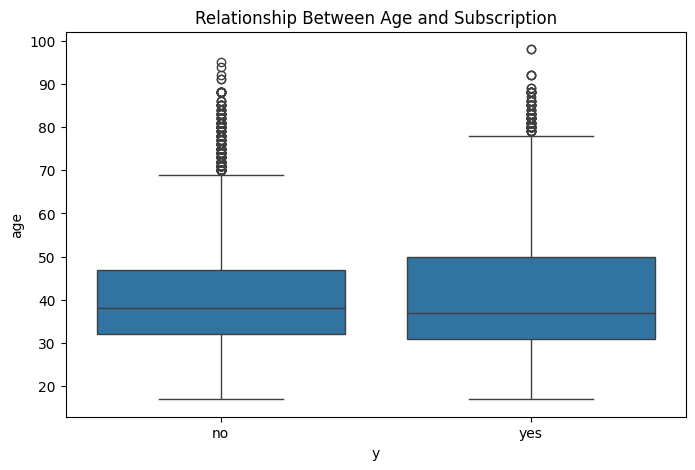

In [25]:
# Relationship Between Age and Subscription

plt.figure(figsize = (8,5))
sns.boxplot(data = df, x = 'y', y = 'age')
plt.title('Relationship Between Age and Subscription')
plt.show()

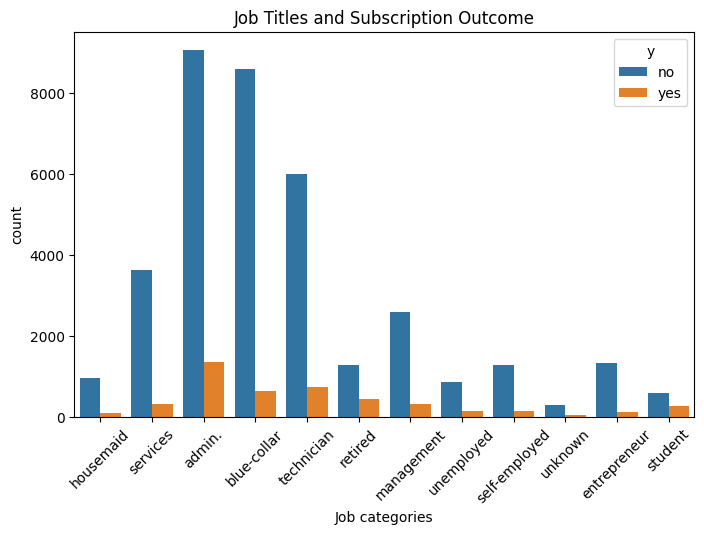

In [26]:
# Job vs Subscription

plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'job', hue = 'y')
plt.title('Job Titles and Subscription Outcome')
plt.xlabel('Job categories')
plt.xticks(rotation = 45)
plt.show()


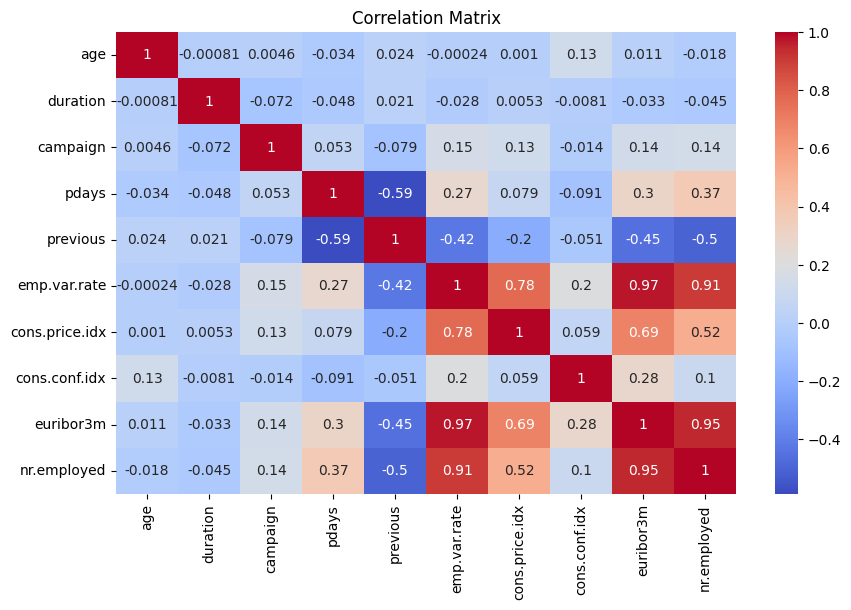

In [27]:
# Correlation Matrix (Numerical Only)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Convert Categorical Variables to Numeric (Label Encoding / One-Hot Encoding)

In [28]:
# Show all object (categorical) columns
categorical_col = df.select_dtypes(include = 'object').columns.tolist()
print('Categorical columns:', categorical_col)

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [29]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

df_encoded = pd.get_dummies(df, drop_first = True)
print('Shape After Encoding:',df_encoded.shape)

Shape After Encoding: (41176, 54)


In [32]:
df_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False


## Feature Scaling (for Numerical Features)

In [33]:
print([col for col in df_encoded.columns if 'y' in col])


['pdays', 'nr.employed', 'job_self-employed', 'job_unemployed', 'education_basic.6y', 'education_basic.9y', 'education_university.degree', 'default_yes', 'housing_yes', 'loan_yes', 'month_may', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'y_yes']


In [34]:
# First, find actual numeric columns
all_numeric = df_encoded.select_dtypes(include='number').columns

# Drop target column if it exists
target = 'y_yes' if 'y_yes' in all_numeric else 'y'
numeric_cols = [col for col in all_numeric if col != target]

# Apply scaling
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

## Train-Test Split

In [35]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['y_yes'])  
y = df_encoded['y_yes']          

# Split data to prevent overfitting
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (32940, 53)
Testing size: (8236, 53)


### Feature Importance / Correlation with Target

In [36]:
corr_target = df_encoded.corr()['y_yes'].sort_values(ascending= False)
print(corr_target.head(10))

y_yes               1.000000
duration            0.405297
poutcome_success    0.316302
previous            0.230202
month_mar           0.144027
month_oct           0.137538
month_sep           0.126079
job_student         0.093962
job_retired         0.092364
month_dec           0.079311
Name: y_yes, dtype: float64


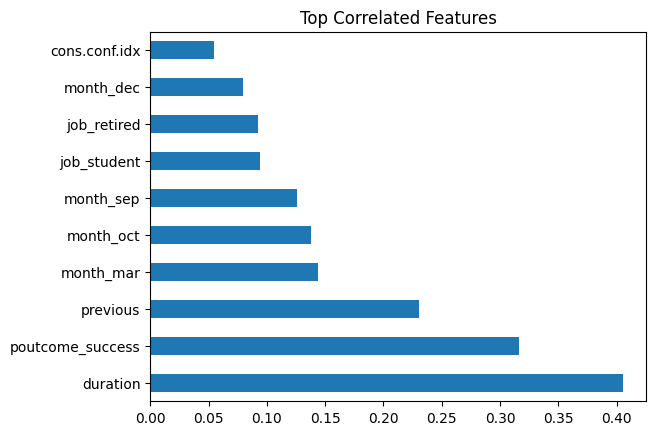

In [37]:
corr_target.drop('y_yes').head(10).plot(kind='barh', title="Top Correlated Features")
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Logistic Regression Model as a baseline model which is fast and interpretable for binary classification (yes/no)

In [40]:
#Logistic model
logreg = LogisticRegression(max_iter=1000)

#train
logreg.fit(X_train, Y_train)

#test 
y_pred_logreg = logreg.predict(X_test)


#

### Decision Tree Model which is intuitive and handles both numeric and categorical features well. It also reveals important decision rules.

In [41]:
#Decision tree model
tree = DecisionTreeClassifier(random_state=42)

#train
tree.fit(X_train, Y_train)

#test
y_pred_tree = tree.predict(X_test)

In [ ]:
#Logistic Regression Evaluation

print("Logistic Regression Result:")
print(confusion_matrix(Y_test, y_pred_logreg))
print(classification_report(Y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(Y_test, y_pred_logreg))

Logistic Regression Result:
[[7065  200]
 [ 577  394]]
              precision    recall  f1-score   support

       False       0.92      0.97      0.95      7265
        True       0.66      0.41      0.50       971

    accuracy                           0.91      8236
   macro avg       0.79      0.69      0.73      8236
weighted avg       0.89      0.91      0.90      8236

Accuracy: 0.9056580864497329


In [43]:
#Descission Tree Evaluation

print("Decission Tree Result:")
print(confusion_matrix(Y_test, y_pred_tree))
print(classification_report(Y_test, y_pred_tree))
print("Accuracy:", accuracy_score(Y_test, y_pred_tree))

Decission Tree Result:
[[6802  463]
 [ 453  518]]
              precision    recall  f1-score   support

       False       0.94      0.94      0.94      7265
        True       0.53      0.53      0.53       971

    accuracy                           0.89      8236
   macro avg       0.73      0.73      0.73      8236
weighted avg       0.89      0.89      0.89      8236

Accuracy: 0.8887809616318602


### Feature Importance for Decission Tree

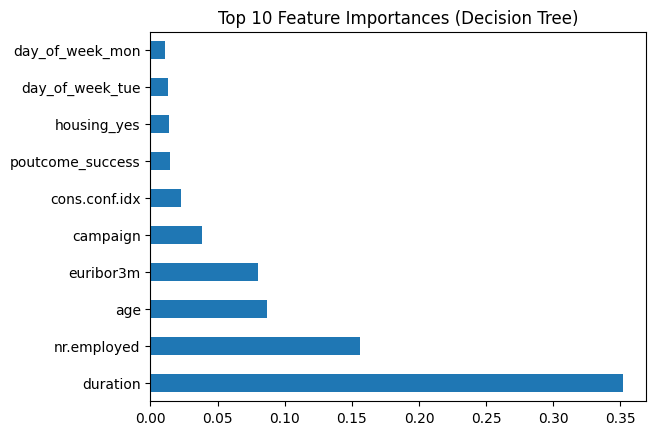

In [44]:
feature_importances = pd.Series(tree.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.show()

####  Hyperparameter Tuning with GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to test
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

#create base model
tree = DecisionTreeClassifier(random_state=42)
#Grid Search
grid_search = GridSearchCV(tree, param_grid, cv=5, n_jobs=1, scoring='accuracy')
#fit the model
grid_search.fit(X_train, Y_train)
best_tree = grid_search.best_estimator_
#predict on best model
y_pred_best_tree = best_tree.predict(X_test)

In [46]:
print("Tuened Decission Tree Results:")
print(confusion_matrix(Y_test, y_pred_best_tree))
print(classification_report(Y_test, y_pred_best_tree))
print("Accuracy:", accuracy_score(Y_test, y_pred_best_tree))


Tuened Decission Tree Results:
[[6984  281]
 [ 456  515]]
              precision    recall  f1-score   support

       False       0.94      0.96      0.95      7265
        True       0.65      0.53      0.58       971

    accuracy                           0.91      8236
   macro avg       0.79      0.75      0.77      8236
weighted avg       0.90      0.91      0.91      8236

Accuracy: 0.9105148130160272


### Visualize Improved Feature Importances

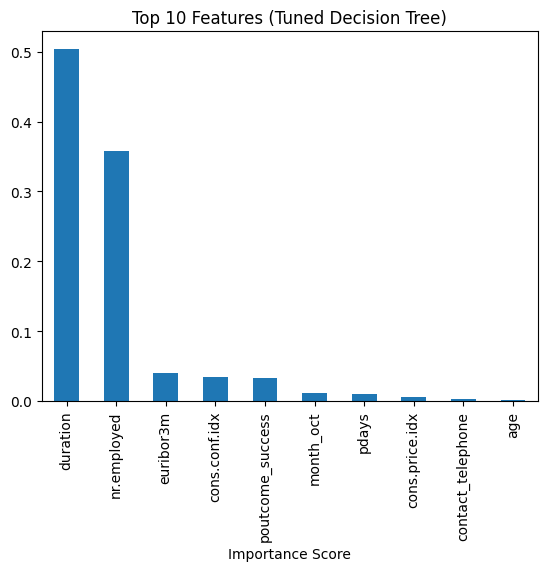

In [47]:
feature_importances = pd.Series(best_tree.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False).head(10)

feature_importances.plot(kind = 'bar')
plt.title("Top 10 Features (Tuned Decision Tree)")
plt.xlabel("Importance Score")
plt.show()

# 🧾 Banking Customer Analysis Report Summary

## 📌 Project Objective:
Analyze banking customer data to uncover patterns in behavior, predict campaign success, and provide insights for marketing optimization.

---

## 📊 Step 1: Data Cleaning & Exploration
- Checked for null values and duplicates — none found, indicating a clean dataset.
- Inspected variable types and ensured all were in proper format.
- Explored key categorical features like `job`, `marital`, and `education`.
- Noted imbalances in target variable `y` (campaign response).

---

## 📉 Step 2: Feature Engineering & Encoding
- Categorical variables were transformed using **One-Hot Encoding**.
- Numerical variables were standardized with **StandardScaler**.
- The dataset was split into features (`X`) and target (`y`).

---

## 🤖 Step 3: Model Building & Evaluation
- **Logistic Regression** and **Decision Tree** models were implemented.
- Model performance was evaluated using:
  - **Confusion Matrix**
  - **Accuracy, Precision, Recall, and F1-Score**
- Found trade-offs between precision and recall; logistic regression was more balanced.

---

## 💡 Key Insights:
- Age and duration of call had strong influence on customer response.
- Clients with higher education and existing contacts were more likely to respond positively.
- Campaign success is relatively rare, so focusing on precision helps reduce false positives.

---

## 📈 Recommendations:
1. **Target educated, middle-aged professionals** with tailored offers.
2. **Shorten call durations** for non-responsive clients to optimize resources.
3. **Personalize follow-ups** for clients with positive past responses.
4. Use model predictions to **prioritize leads** and focus marketing efforts.

---

## 🧠 Next Steps:
- Test additional models (Random Forest, XGBoost).
- Apply **SMOTE** or other techniques to handle class imbalance.
- Consider customer segmentation for personalized campaign strategies.